In [1]:
from qiskit.visualization import plot_bloch_multivector, plot_histogram, plot_state_qsphere
from qiskit import QuantumCircuit, QuantumRegister, ClassicalRegister
from qiskit import Aer, execute
import numpy as np

pi = np.pi

In [4]:
# Funcion para ejecutar el circuito en el simulador statevector
# Regresa los resultados, el diagrama de circuito y su diagrama en la esfera de Bloch 
def ejecutar_circuito_sv(quantum_circuit):
    statevector_simulator = Aer.get_backend('statevector_simulator')
    result = execute(quantum_circuit, statevector_simulator).result()
    statevector_results = result.get_statevector(quantum_circuit)
    circuit_diagram = quantum_circuit.draw()
    q_sphere = plot_state_qsphere(statevector_results)
    return statevector_results, circuit_diagram, q_sphere

In [2]:
#Compuerta U3
qc = QuantumCircuit(1)

In [3]:
qc.u3(pi/2,pi/2,pi/2,0)

<ipython-input-3-ad4a30bb1b92>:1: DeprecationWarning: The QuantumCircuit.u3 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use QuantumCircuit.u instead, which acts identically. Alternatively, you can decompose u3 in terms of QuantumCircuit.p and QuantumCircuit.sx: u3(ϴ,φ,λ) = p(φ+π) sx p(ϴ+π) sx p(λ) (2 pulses on hardware).
  qc.u3(pi/2,pi/2,pi/2,0)


In [5]:
result, img, qsphere = ejecutar_circuito_sv(qc)

In [6]:
result

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

In [7]:
img

┌─────────────────┐
q_0: ┤ U3(π/2,π/2,π/2) ├
     └─────────────────┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


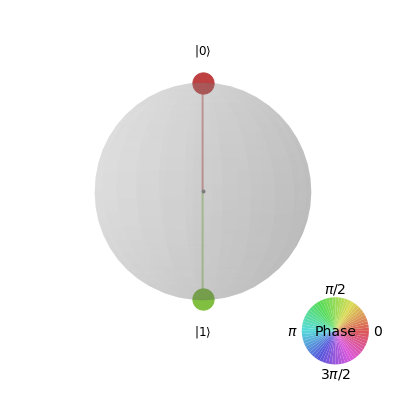

In [8]:
qsphere

In [9]:
#Compuerta U2
qc2 = QuantumCircuit(1)

In [10]:
qc2.u2(pi/2,pi/2,0)

<ipython-input-10-b94397ee7e1d>:1: DeprecationWarning: The QuantumCircuit.u2 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You can use the general 1-qubit gate QuantumCircuit.u instead: u2(φ,λ) = u(π/2, φ, λ). Alternatively, you can decompose it interms of QuantumCircuit.p and QuantumCircuit.sx: u2(φ,λ) = p(π/2+φ) sx p(λ-π/2) (1 pulse on hardware).
  qc2.u2(pi/2,pi/2,0)


In [12]:
result2, img2, qpshere2 = ejecutar_circuito_sv(qc2)

In [13]:
result2

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

In [14]:
result

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

In [15]:
img2

┌─────────────┐
q_0: ┤ U2(π/2,π/2) ├
     └─────────────┘

In [16]:
# Ahora vamos a explorar una herramienta para descomponer las compuertas en sus elementos basicos:
qc2_desc = qc2.decompose()

In [17]:
qc2_desc.draw()

┌─────────────────┐
q_0: ┤ U3(π/2,π/2,π/2) ├
     └─────────────────┘

In [18]:
# Compuerta U1
qc1 = QuantumCircuit(1)

In [19]:
# Ahora aplicamos una compuerta de Hadamard para poder visualizar el resultado
qc1.h(0)

In [20]:
qc1.u1(pi/2,0)

<ipython-input-20-ddc637b1cc94>:1: DeprecationWarning: The QuantumCircuit.u1 method is deprecated as of 0.16.0. It will be removed no earlier than 3 months after the release date. You should use the QuantumCircuit.p method instead, which acts identically.
  qc1.u1(pi/2,0)


In [21]:
result1, img1, qsphere1 = ejecutar_circuito_sv(qc1)

In [22]:
result1

array([7.07106781e-01+0.j        , 2.00307049e-16+0.70710678j])

In [23]:
result

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

In [24]:
result2

array([7.07106781e-01+0.j        , 4.32978028e-17+0.70710678j])

In [26]:
img1

┌───┐┌─────────┐
q_0: ┤ H ├┤ U1(π/2) ├
     └───┘└─────────┘

/usr/local/lib/python3.9/site-packages/qiskit/visualization/state_visualization.py:57: MatplotlibDeprecationWarning: 
The M attribute was deprecated in Matplotlib 3.4 and will be removed two minor releases later. Use self.axes.M instead.
  xs, ys, _ = proj3d.proj_transform(xs3d, ys3d, zs3d, renderer.M)


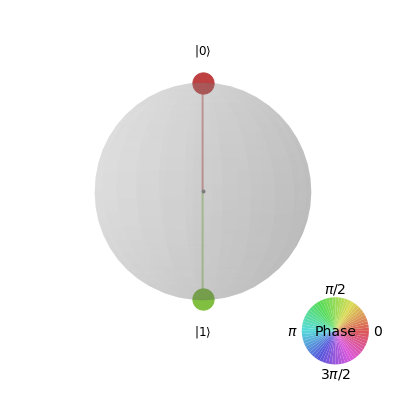

In [27]:
qsphere1

In [28]:
qc1_desc = qc1.decompose()

In [30]:
qc1_desc.draw()

┌─────────┐┌─────────────┐
q_0: ┤ U2(0,π) ├┤ U3(0,0,π/2) ├
     └─────────┘└─────────────┘